# Trigonometrikus plot

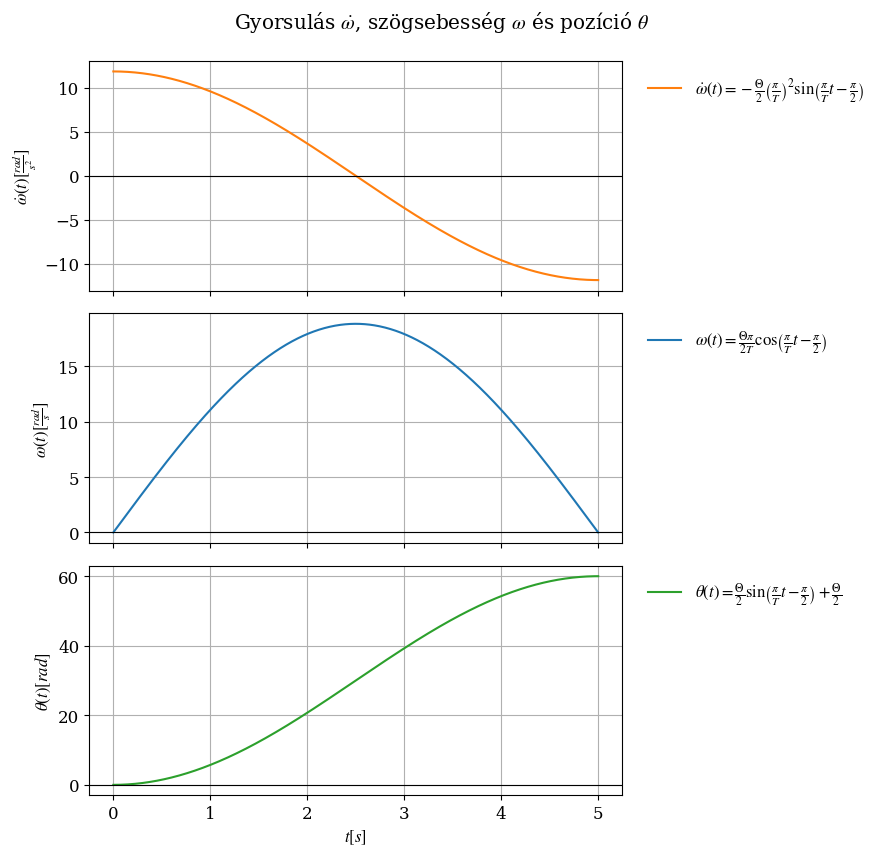

In [7]:
# Example: save as plot_theta.py and run `python plot_theta.py`
import numpy as np
import matplotlib.pyplot as plt

# Use LaTeX-style math fonts (mathtext) and serif family
plt.rcParams.update({
    "font.family": "serif",
    "mathtext.fontset": "stix",
    "font.size": 12
})

def theta_t(t, Theta, T):
    return (Theta / 2.0) * np.sin((np.pi / T) * t - np.pi / 2.0) + (Theta / 2.0)

# Parameters (change as needed)
Theta = 60.0   # amplitude / max value
T = 5.0        # period parameter

# Time array
t = np.linspace(0, T, 1000)
theta = theta_t(t, Theta, T)

# Analytical derivatives
omega = (Theta * np.pi) / (2.0 * T) * np.cos((np.pi / T) * t - np.pi / 2.0)                 # d(theta)/dt
omega_dot = - (Theta / 2.0) * (np.pi / T)**2 * np.sin((np.pi / T) * t - np.pi / 2.0)       # d^2(theta)/dt^2

# Create 3 vertical subplots: top=omega, middle=omega_dot, bottom=theta
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(9, 9))
ax_omega_dot, ax_omega, ax_theta = axs

ax_omega_dot.plot(t, omega_dot, color='C1', label=r'$\dot{\omega}(t)=-\frac{\Theta}{2}\left(\frac{\pi}{T}\right)^2\sin\!\left(\frac{\pi}{T}t-\frac{\pi}{2}\right)$')
ax_omega_dot.set_ylabel(r'$\dot{\omega}(t) [\frac{rad}{s^2}]$')
ax_omega_dot.legend(loc='upper right', frameon=False)
ax_omega_dot.grid(True)

ax_omega.plot(t, omega, color='C0', label=r'$\omega(t)=\frac{\Theta\pi}{2T}\cos\!\left(\frac{\pi}{T}t-\frac{\pi}{2}\right)$')
ax_omega.set_ylabel(r'$\omega(t) [\frac{rad}{s}]$')
ax_omega.legend(loc='upper right', frameon=False)
ax_omega.grid(True)

ax_theta.plot(t, theta, color='C2', label=r'$\theta(t)=\frac{\Theta}{2}\sin\!\left(\frac{\pi}{T}t-\frac{\pi}{2}\right)+\frac{\Theta}{2}$')
ax_theta.set_xlabel(r'$t [s]$')
ax_theta.set_ylabel(r'$\theta(t) [rad]$')
ax_theta.legend(loc='upper right', frameon=False)
ax_theta.grid(True)

# make the zereo lines thicker
for ax in axs:
    ax.axhline(0, color='black', linewidth=0.8)

#put the legends outside the plots
ax_omega_dot.legend(loc='upper left', bbox_to_anchor=(1.02, 1), frameon=False)
ax_omega.legend(loc='upper left', bbox_to_anchor=(1.02, 1), frameon=False)
ax_theta.legend(loc='upper left', bbox_to_anchor=(1.02, 1), frameon=False)

fig.suptitle(r"Gyorsulás $\dot{\omega}$, szögsebesség $\omega$ és pozíció $\theta$", y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Debounce plot

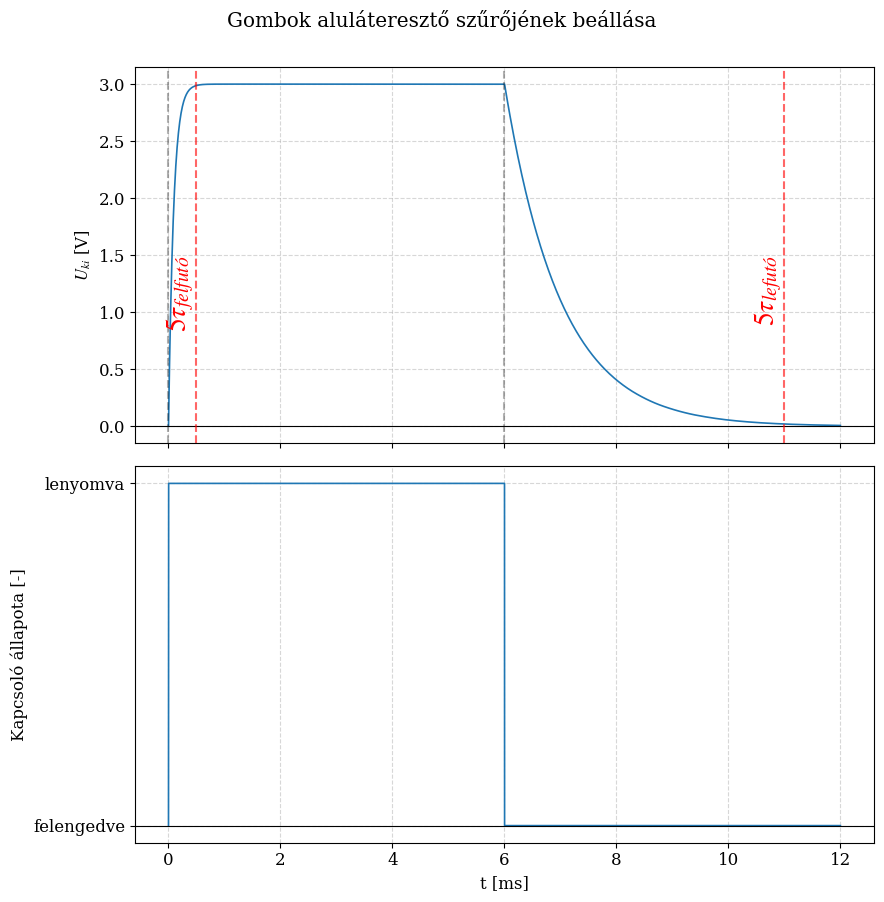

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Use LaTeX-style math fonts (mathtext) and serif family
plt.rcParams.update({
    "font.family": "serif",
    "mathtext.fontset": "stix",
    "font.size": 12
})

# --- LTspice TXT beolvasása ---
df = pd.read_csv("Debounce.txt", sep="\t")

# --- Plot létrehozása ---

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(9, 9))

V_out, Timing = axs

# OUT jel
V_out.plot(df["time"]*1e3, df["V(n005)"], label=r"$V_{out}$", linewidth=1.2)
V_out.set_ylabel(r"$U_{ki}$ [V]")

# Gomb időzítés 0–1-re normalizáltan
Timing.plot(df["time"]*1e3, df["V(timing)"]/3.3, label="Időzítés", linewidth=1.2)
Timing.set_ylabel("Kapcsoló állapota [-]")
Timing.set_xlabel("t [ms]")

# --- Csak 0 és 1 legyen y-tick, egész számokkal ---
Timing.set_yticks([0, 1])
Timing.set_yticklabels(["felengedve", "lenyomva"])

# --- Grid és layout ---
for ax in fig.get_axes():
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.label_outer()
    ax.axhline(0, color='black', linewidth=0.8)

# --- Függőleges vonalak a kimeneten ---
txtsize = 20
# Gomb le
V_out.axvline(0, color="black", linestyle="--", alpha=0.3)
# Gomb fel
V_out.axvline(6, color="black", linestyle="--", alpha=0.3)

# 0.5 ms
V_out.axvline(0.5, color="red", linestyle="--", alpha=0.6)
V_out.text(0.5, 1.5, r"$5 \tau_{felfutó}$",
           rotation=90, va="top", ha="right", color="red", size = txtsize)

# 11 ms
V_out.axvline(11, color="red", linestyle="--", alpha=0.6)
V_out.text(11, 1.5, r"$5 \tau_{lefutó}$",
           rotation=90, va="top", ha="right", color="red", size = txtsize)


fig.suptitle(r"Gombok aluláteresztő szűrőjének beállása", y=1)
plt.tight_layout()
plt.show()
